# 🔹 Introduction to Clustering in Machine Learning
Clustering is an unsupervised learning technique that groups similar data points together based on patterns in the dataset. This notebook explores different clustering algorithms and their effectiveness using the Wine dataset.

## 📌 What This Notebook Covers
### ✅ Feature Selection for Clustering:

* Variance Thresholding (Removes low-variance features)
* Correlation Filtering (Removes highly correlated redundant features)
* Principal Component Analysis (PCA) (Reduces dimensionality and improves cluster separation)

### ✅ Choosing the Right Clustering Algorithm:

* Data Visualization using PCA and t-SNE (Understanding data distribution before clustering)
* Elbow Method & Silhouette Score (Choosing the optimal number of clusters for K-Means & GMM)
* Dendrogram Analysis (Deciding clusters for Hierarchical Clustering)
* k-Nearest Neighbors Distance Plot (Finding the best eps value for DBSCAN)

### ✅ Building and Visualizing Clustering Models:

* K-Means Clustering (Partitions data into K groups based on centroids)
* Gaussian Mixture Model (GMM) (Probabilistic clustering for overlapping clusters)
* Hierarchical Clustering (Agglomerative clustering using a tree structure)
* DBSCAN (Density-Based Clustering) (Identifies clusters based on density and noise points)

### ✅ Predicting and Evaluating Clusters on New Data:

* Assigning new test data points to their respective clusters
* Visualizing training and test clusters with customized plots
* This notebook provides a complete end-to-end guide for clustering analysis and visualization using Python. 🚀

💡 How to Use This Notebook?
* 1️⃣ Run feature selection to understand which features impact clustering.
* 2️⃣ Visualize data distribution using PCA/t-SNE.
* 3️⃣ Choose the best clustering algorithm based on data patterns.
* 4️⃣ Optimize parameters (K, eps, min_samples) using Elbow, Silhouette, and KNN plots.
* 5️⃣ Train and evaluate clustering models, then predict on test data.

🚀 By the end, you'll have a strong understanding of how different clustering methods perform on real-world data. 🎯



In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import ipywidgets as widgets
from IPython.display import display
warnings.filterwarnings("ignore")


In [2]:
# Load the Wine dataset
wine_data = load_wine()

# Convert it to a pandas DataFrame
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Display the dataset
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
df.shape

(178, 13)

In [4]:
# Split the dataset into 80% training and 20% testing
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test data
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

# Convert to DataFrame for easy handling
df_train_scaled_df = pd.DataFrame(df_train_scaled, columns=df.columns)
df_test_scaled_df = pd.DataFrame(df_test_scaled, columns=df.columns)

# Feature Selection

#### Advantages of Feature Selection Methods in Clustering
1. Variance Thresholding (Helps in: K-Means, GMM, Hierarchical Clustering)
* Removes non-informative features (low variance).
* Prevents clustering bias from unimportant features.
* Speeds up clustering by reducing dataset size.

2. Correlation Filtering (Helps in: K-Means, GMM, Hierarchical Clustering)
* Removes redundant features, preventing biased distance calculations.
* Enhances cluster separability, making groups distinct.
* Improves computational efficiency by reducing feature space.

3. PCA (Principal Component Analysis) (Helps in: K-Means, GMM, Spectral Clustering)
* Reduces dimensionality, preventing the curse of dimensionality.
* Improves cluster separation in a lower-dimensional space.
* Speeds up clustering, making algorithms more efficient.
* Enables visualization of clusters in 2D/3D.

### 1. Variance Thresholding


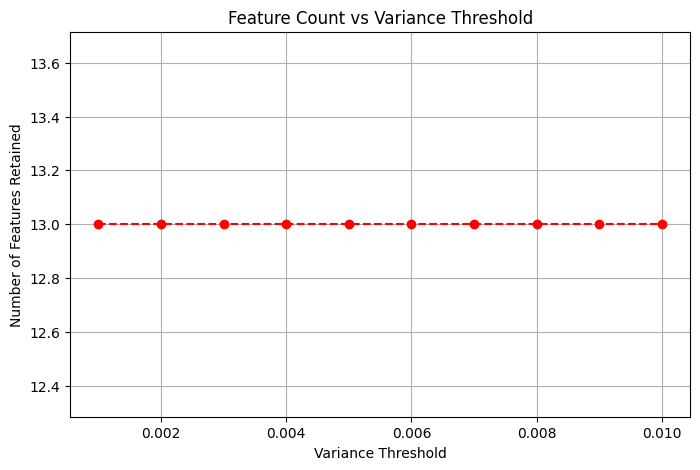

In [6]:

# Define variance thresholds to test (10 evenly spaced values)
variance_thresholds = np.linspace(0.001, 0.01, 10)  # Adjusted to 10 values
num_features = []

for threshold in variance_thresholds:
    selector = VarianceThreshold(threshold=threshold)
    df_selected = selector.fit_transform(df_train_scaled)  # Apply threshold
    num_features.append(df_selected.shape[1])  # Count remaining features

# Plot Number of Features vs Variance Threshold
plt.figure(figsize=(8, 5))
plt.plot(variance_thresholds, num_features, marker='o', linestyle='--', color='r')
plt.xlabel("Variance Threshold")
plt.ylabel("Number of Features Retained")
plt.title("Feature Count vs Variance Threshold")
plt.grid()
plt.show()


#### Choosing right value:

* The number of features is reduced but not too aggressively.
* The curve starts flattening (less reduction in features as threshold increases).

Example Decision (Hypothetical):
If the feature count drops significantly between 0.001 and 0.02, but remains similar after 0.02, then 0.02 is a good choice.

In [7]:
# # Set the best variance threshold from the graph
# best_variance_threshold = 0.02  # Example, change based on your graph

# # Apply variance thresholding
# selector = VarianceThreshold(threshold=best_variance_threshold)
# df_selected_variance = selector.fit_transform(df_train_scaled)

### 2. Correlation Filtering

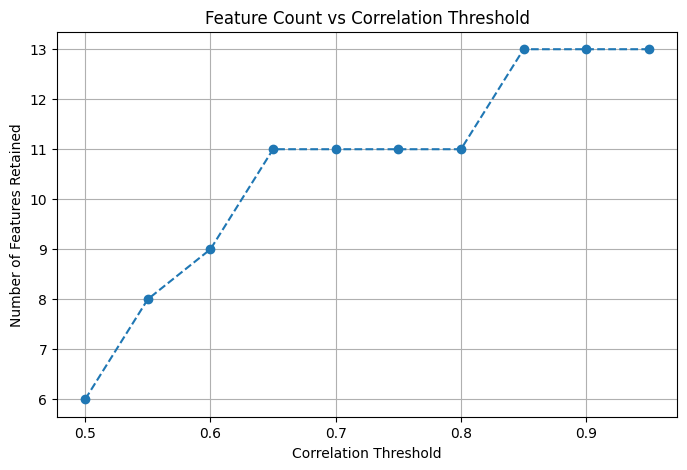

In [8]:


# Define correlation thresholds to test
correlation_thresholds = np.linspace(0.5, 0.95, 10)  # Testing values from 0.5 to 0.95
num_features = []

for threshold in correlation_thresholds:
    df_corr = pd.DataFrame(df_train_scaled, columns=df.columns)  # Use features after variance filtering
    corr_matrix = df_corr.corr().abs()

    # Identify features to remove
    to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:  # If correlation > threshold
                to_drop.add(corr_matrix.columns[j])  # Drop one of the correlated features

    # Drop the selected features
    df_selected = df_corr.drop(columns=to_drop)
    num_features.append(df_selected.shape[1])

# Plot Number of Features vs Correlation Threshold
plt.figure(figsize=(8, 5))
plt.plot(correlation_thresholds, num_features, marker='o', linestyle='--')
plt.xlabel("Correlation Threshold")
plt.ylabel("Number of Features Retained")
plt.title("Feature Count vs Correlation Threshold")
plt.grid()
plt.show()


#### How to Choose the Best Correlation Threshold?
* Look for the point where the feature count stabilizes.
* Avoid choosing a very high threshold (~0.9+), as it keeps too many redundant features.
* A good balance is usually in the range of ~0.75 - 0.85.

#### Example Decision Based on the Graph
* If the feature count keeps increasing but flattens at ~0.8 or ~0.85, pick that value.
* If feature count jumps significantly from 0.5 to 0.75 but changes very little after 0.85, then 0.85 is a good choice.
* If 0.9 retains almost all features compared to 0.85, then 0.9 is too high.

In [9]:
# # Set the best correlation threshold from the graph
# best_correlation_threshold = 0.75  # Example, change based on your graph

# # Apply correlation filtering
# corr_matrix = pd.DataFrame(df_train_scaled, columns=df.columns).corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# to_drop = [column for column in upper.columns if any(upper[column] > best_correlation_threshold)]

# df_selected_correlation = pd.DataFrame(df_train_scaled, columns=df.columns).drop(columns=to_drop, errors="ignore")

# # Print new shape
# print(f"Feature count after correlation filtering: {df_selected_correlation.shape[1]}")


### 3. PCA Component Selection

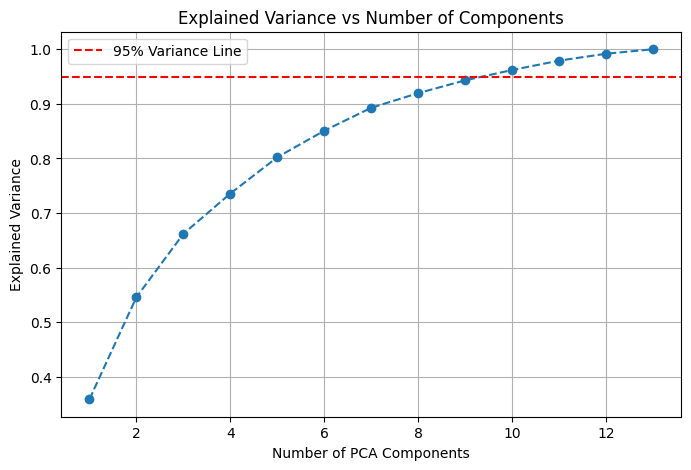

In [10]:


# Define number of components to test
num_components = np.arange(1, df_train_scaled.shape[1] + 1, 1)
explained_variance = []

for n in num_components:
    pca = PCA(n_components=n)
    pca.fit(df_train_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

# Plot Explained Variance vs PCA Components
plt.figure(figsize=(8, 5))
plt.plot(num_components, explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of PCA Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Line")
plt.legend()
plt.grid()
plt.show()


In [11]:
# # Set the best number of PCA components from the graph
# best_pca_components = 5  # Example, change based on your graph

# # Apply PCA for dimensionality reduction
# pca = PCA(n_components=best_pca_components)
# df_selected_pca = pca.fit_transform(df_selected_correlation)

# # Print new shape
# print(f"Feature count after PCA reduction: {df_selected_pca.shape[1]}")

# Choosing the Right Clustering Algorithm

### Check Data Distribution & Cluster Tendency

### 1. Visualize Data in 2D/3D (Using PCA or t-SNE)

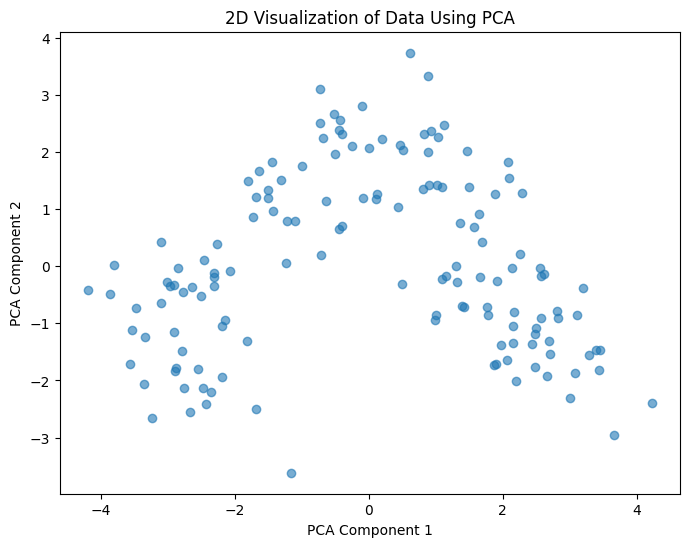

In [12]:

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Visualization of Data Using PCA")
plt.show()


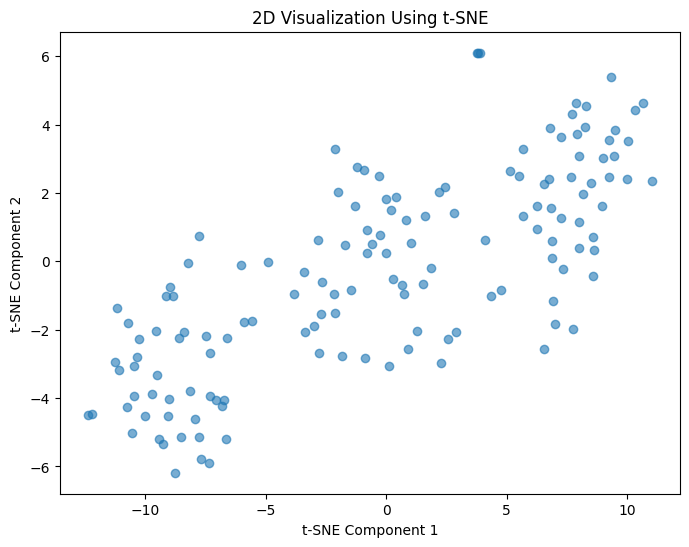

In [13]:

tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.6)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("2D Visualization Using t-SNE")
plt.show()


### How to Interpret PCA and t-SNE Graphs for Clustering?
1. PCA (Principal Component Analysis) 2D Plot
* Distinct, well-separated groups → K-Means or GMM is suitable.
* Overlapping or elongated clusters → DBSCAN or Hierarchical Clustering may work better.
* Uniform spread (no clear groups) → Clustering may not be meaningful, or higher dimensions matter.
*  Next Step: If clusters are clear, use K-Means/GMM. If not, try DBSCAN/t-SNE.

2. t-SNE 2D Plot
* Compact, distinct clusters → K-Means/GMM can be effective.
* Clusters of varying density → DBSCAN or OPTICS is better.
* No clear groups (uniform spread) → Data may not have natural clusters.
* Next Step: If t-SNE shows distinct groups, proceed with K-Means/GMM. If irregular clusters, try DBSCAN.

### Graph Outcome - Best Clustering Algorithm
* Clear, round clusters -------------- PCA/t-SNE	K-Means, GMM
* Irregular or dense clusters -------- DBSCAN, OPTICS
* No distinct groups ---------------- Clustering may not be effective

# Determine the Optimal Number of Clusters

### For K-Means & GMM 

### 1. Elbow Method

#### ✅ Choose K where the curve starts flattening.

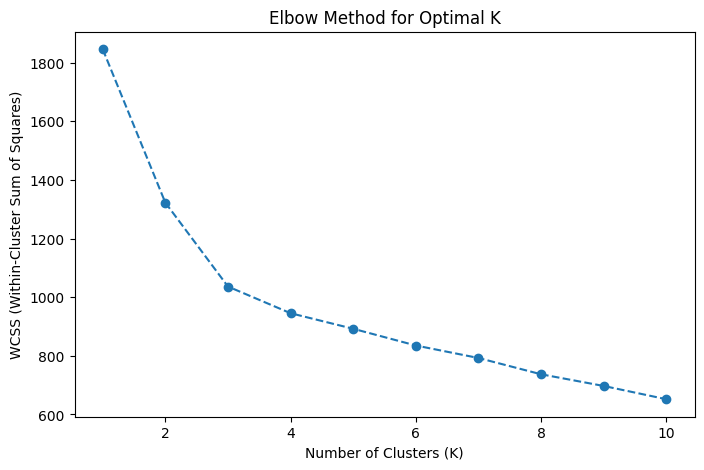

In [14]:


wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)  # Testing for K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_train_scaled)  # Use the final preprocessed dataset
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


### 2. Silhouette Score

#### ✅ Pick K where silhouette score is highest.

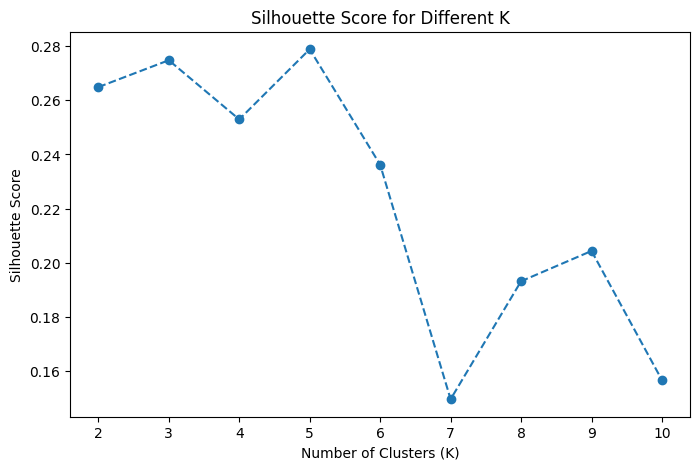

In [15]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):  # K should be at least 2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_train_scaled)
    score = silhouette_score(df_train_scaled, labels)
    sil_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K")
plt.show()


### Dendrogram (For Hierarchical Clustering)

#### ✅ Look for the largest vertical jump to decide cluster count.

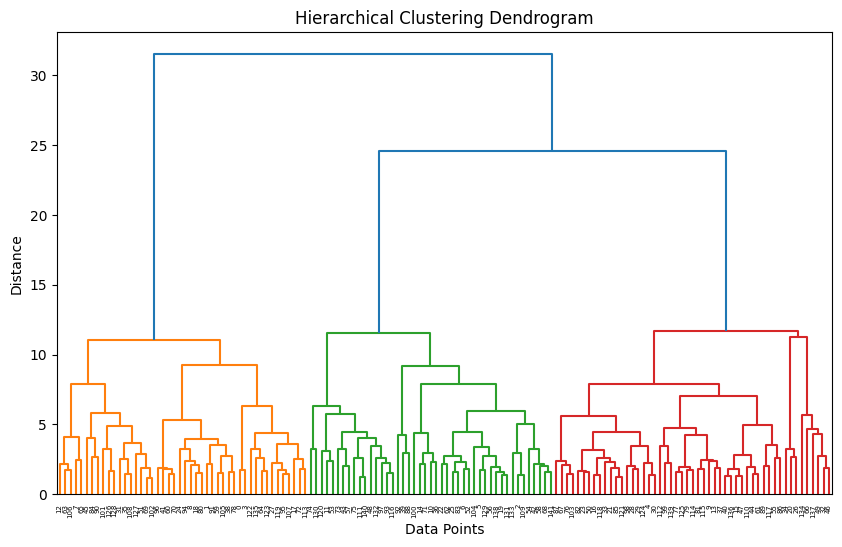

In [16]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(df_train_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


#  Building Clustering Models

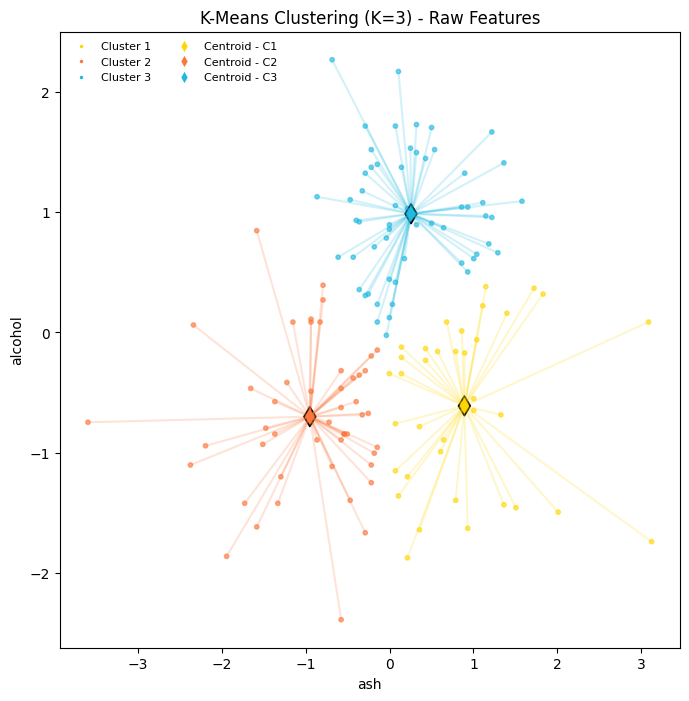

In [17]:

# 🚀 Toggle between using PCA or raw features
use_pca = False  # Set to True for PCA, False for raw features

# Ensure df_train_scaled is a DataFrame with correct column names
if isinstance(df_train_scaled, np.ndarray):  
    df_train_final = pd.DataFrame(df_train_scaled, columns=df_train.columns)  # Use original feature names

# Define which features to use if not using PCA
selected_features = ['ash', 'alcohol']  # Ensure these exist in df_train_original.columns

# If using raw features, check if they exist
if not use_pca:
    if not all(feature in df_train_final.columns for feature in selected_features):
        raise KeyError(f"Selected features {selected_features} not found in DataFrame columns: {df_train_final.columns}")

    df_viz = df_train_final[selected_features].copy()
    x_label, y_label = selected_features[0], selected_features[1]

# Apply PCA if use_pca is True
if use_pca:
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    df_viz = pd.DataFrame(pca.fit_transform(df_train_final), columns=['PCA1', 'PCA2'])
    x_label, y_label = 'PCA Component 1', 'PCA Component 2'

# Set the best number of clusters (K) from analysis
best_k = 3  # Change this based on analysis

# Fit K-Means
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10)
df_viz['Cluster'] = kmeans.fit_predict(df_viz)

# Get centroids
centroids = kmeans.cluster_centers_
cen_x = centroids[:, 0]  
cen_y = centroids[:, 1]

# Define a fixed list of colors (Extendable for more clusters)
fixed_colors = ['gold', '#fc763d', '#20b9df', '#ff33cc', '#33ff57', '#ff5733', 
                '#3399ff', '#ff9933', '#9966ff', '#ff6666', '#66ff66', '#ffcc00']

# Ensure we have enough colors for the chosen K
if best_k > len(fixed_colors):
    raise ValueError(f"Not enough predefined colors for {best_k} clusters. Extend the color list!")

# Assign colors dynamically from the predefined list
colors = {i: fixed_colors[i] for i in range(best_k)}

# Map colors and centroids to clusters
df_viz['cen_x'] = df_viz['Cluster'].map({i: cen_x[i] for i in range(best_k)})
df_viz['cen_y'] = df_viz['Cluster'].map({i: cen_y[i] for i in range(best_k)})
df_viz['c'] = df_viz['Cluster'].map(colors)

# Plot Clusters
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(df_viz.iloc[:, 0], df_viz.iloc[:, 1], c=df_viz['c'], alpha=0.6, s=10)

# Plot Centroids
plt.scatter(cen_x, cen_y, marker='d', c=[colors[i] for i in range(best_k)], s=100, edgecolor='black', linewidth=1.2)

# Plot lines connecting points to their centroids
for _, val in df_viz.iterrows():
    plt.plot([val.iloc[0], val.cen_x], [val.iloc[1], val.cen_y], c=val.c, alpha=0.2)

# Legend for clusters and centroids
cent_leg = [Line2D([0], [0], marker='d', color='w', label=f'Centroid - C{i+1}', 
                    markerfacecolor=colors[i], markersize=10) for i in range(best_k)]

legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}', 
                          markerfacecolor=colors[i], markersize=5) for i in range(best_k)]

legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper left', ncol=2, fontsize=8, markerscale=0.7, frameon=False)


# Plot Settings
plt.title(f'K-Means Clustering (K={best_k}) - {"PCA Components" if use_pca else "Raw Features"}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [18]:

# 🚀 Train K-Means on all features
best_k = 3  # Set based on Elbow/Silhouette method
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10)
df_train_scaled_df['Cluster_KMeans'] = kmeans.fit_predict(df_train_scaled_df)

# 🔹 Predict Clusters for Test Data
df_test_scaled_df['Cluster_KMeans'] = kmeans.predict(df_test_scaled_df)

In [19]:
df_test_scaled_df['Cluster_KMeans'].head()

0    0
1    0
2    1
3    0
4    2
Name: Cluster_KMeans, dtype: int32

### 2. Gaussian Mixture Model (GMM) with Probability Density

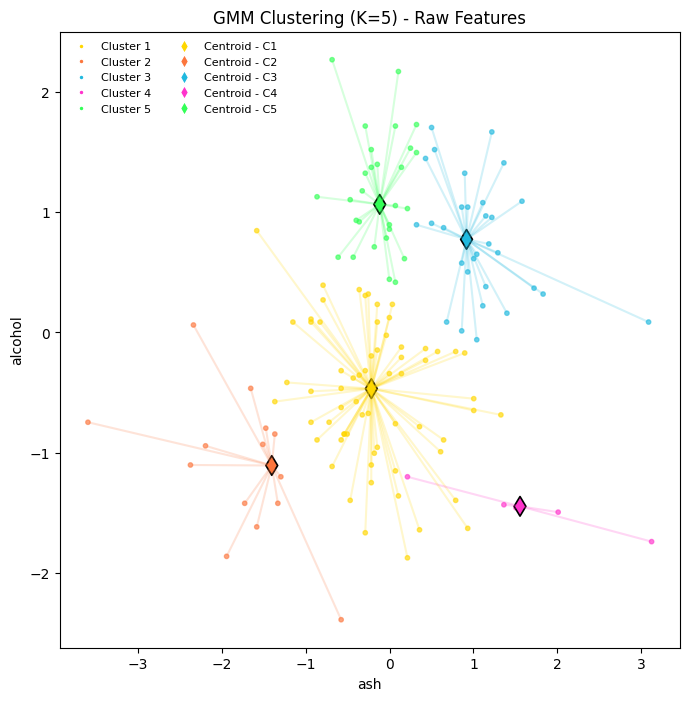

In [20]:

# 🚀 Toggle between using PCA or raw features
use_pca = False  # Set to True for PCA, False for raw features

# Ensure df_train_scaled is a DataFrame with correct column names
if isinstance(df_train_scaled, np.ndarray):  
    df_train_final = pd.DataFrame(df_train_scaled, columns=df_train.columns)  # Use original feature names

# Define which features to use if not using PCA
selected_features = ['ash', 'alcohol']  # Ensure these exist in df_train_original.columns

# If using raw features, check if they exist
if not use_pca:
    if not all(feature in df_train_final.columns for feature in selected_features):
        raise KeyError(f"Selected features {selected_features} not found in DataFrame columns: {df_train_final.columns}")

    df_viz = df_train_final[selected_features].copy()
    x_label, y_label = selected_features[0], selected_features[1]

# Apply PCA if use_pca is True
if use_pca:
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    df_viz = pd.DataFrame(pca.fit_transform(df_train_final), columns=['PCA1', 'PCA2'])
    x_label, y_label = 'PCA Component 1', 'PCA Component 2'

# Set the best number of clusters (K) from analysis
best_k = 5  # Change this based on analysis

# Fit GMM
gmm = GaussianMixture(n_components=best_k, random_state=42)
df_viz['Cluster'] = gmm.fit_predict(df_viz)

# Get GMM means (equivalent to centroids in K-Means)
centroids = gmm.means_
cen_x = centroids[:, 0]  
cen_y = centroids[:, 1]

# Define a fixed list of colors (Extendable for more clusters)
fixed_colors = ['gold', '#fc763d', '#20b9df', '#ff33cc', '#33ff57', '#ff5733', 
                '#3399ff', '#ff9933', '#9966ff', '#ff6666', '#66ff66', '#ffcc00']

# Ensure we have enough colors for the chosen K
if best_k > len(fixed_colors):
    raise ValueError(f"Not enough predefined colors for {best_k} clusters. Extend the color list!")

# Assign colors dynamically from the predefined list
colors = {i: fixed_colors[i] for i in range(best_k)}

# Map colors and centroids to clusters
df_viz['cen_x'] = df_viz['Cluster'].map({i: cen_x[i] for i in range(best_k)})
df_viz['cen_y'] = df_viz['Cluster'].map({i: cen_y[i] for i in range(best_k)})
df_viz['c'] = df_viz['Cluster'].map(colors)

# Plot Clusters
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(df_viz.iloc[:, 0], df_viz.iloc[:, 1], c=df_viz['c'], alpha=0.6, s=10)

# Plot Centroids (Estimated from GMM Means)
plt.scatter(cen_x, cen_y, marker='d', c=[colors[i] for i in range(best_k)], s=100, edgecolor='black', linewidth=1.2)

# Plot lines connecting points to their estimated centroids
for _, val in df_viz.iterrows():
    plt.plot([val.iloc[0], val.cen_x], [val.iloc[1], val.cen_y], c=val.c, alpha=0.2)

# Legend for clusters and centroids
cent_leg = [Line2D([0], [0], marker='d', color='w', label=f'Centroid - C{i+1}', 
                    markerfacecolor=colors[i], markersize=10) for i in range(best_k)]

legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}', 
                          markerfacecolor=colors[i], markersize=5) for i in range(best_k)]

legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper left', ncol=2, fontsize=8, markerscale=0.7, frameon=False)


# Plot Settings
plt.title(f'GMM Clustering (K={best_k}) - {"PCA Components" if use_pca else "Raw Features"}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [21]:
# 🚀 Train GMM on all features
gmm = GaussianMixture(n_components=best_k, covariance_type='full', random_state=42)
df_train_scaled_df['Cluster_GMM'] = gmm.fit_predict(df_train_scaled_df)

# 🔹 Predict Clusters for Test Data
df_test_scaled_df['Cluster_GMM'] = gmm.predict(df_test_scaled_df)

In [22]:
df_test_scaled_df['Cluster_GMM'].head()

0    1
1    1
2    3
3    1
4    4
Name: Cluster_GMM, dtype: int64

### 3. Agglomerative Clustering

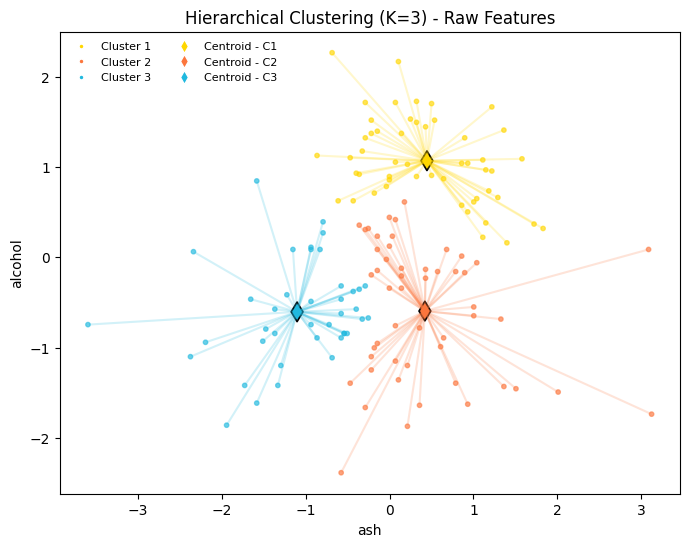

In [23]:

# 🚀 Toggle between using PCA or raw features
use_pca = False  # Set to True for PCA, False for raw features

# Ensure df_train_scaled is a DataFrame with correct column names
if isinstance(df_train_scaled, np.ndarray):  
    df_train_final = pd.DataFrame(df_train_scaled, columns=df_train.columns)  # Use original feature names

# Define which features to use if not using PCA
selected_features = ['ash', 'alcohol']  # Ensure these exist in df_train_original.columns

# If using raw features, check if they exist
if not use_pca:
    if not all(feature in df_train_final.columns for feature in selected_features):
        raise KeyError(f"Selected features {selected_features} not found in DataFrame columns: {df_train_final.columns}")

    df_viz = df_train_final[selected_features].copy()
    x_label, y_label = selected_features[0], selected_features[1]

# Apply PCA if use_pca is True
if use_pca:
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    df_viz = pd.DataFrame(pca.fit_transform(df_train_final), columns=['PCA1', 'PCA2'])
    x_label, y_label = 'PCA Component 1', 'PCA Component 2'

# Set the best number of clusters (K) from analysis
best_k = 3  # Change this based on analysis

# Fit Hierarchical Clustering (Agglomerative)
hc = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
df_viz['Cluster'] = hc.fit_predict(df_viz)

# Compute approximate centroids (mean of each cluster’s points)
centroids = df_viz.groupby("Cluster")[[df_viz.columns[0], df_viz.columns[1]]].mean()
cen_x = centroids.iloc[:, 0].values  
cen_y = centroids.iloc[:, 1].values

# Define a fixed list of colors (Extendable for more clusters)
fixed_colors = ['gold', '#fc763d', '#20b9df', '#ff33cc', '#33ff57', '#ff5733', 
                '#3399ff', '#ff9933', '#9966ff', '#ff6666', '#66ff66', '#ffcc00']

# Ensure we have enough colors for the chosen K
if best_k > len(fixed_colors):
    raise ValueError(f"Not enough predefined colors for {best_k} clusters. Extend the color list!")

# Assign colors dynamically from the predefined list
colors = {i: fixed_colors[i] for i in range(best_k)}

# Map colors and centroids to clusters
df_viz['cen_x'] = df_viz['Cluster'].map({i: cen_x[i] for i in range(best_k)})
df_viz['cen_y'] = df_viz['Cluster'].map({i: cen_y[i] for i in range(best_k)})
df_viz['c'] = df_viz['Cluster'].map(colors)

# Plot Clusters
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df_viz.iloc[:, 0], df_viz.iloc[:, 1], c=df_viz['c'], alpha=0.6, s=10)

# Plot Approximate Centroids (Cluster Mean Points)
plt.scatter(cen_x, cen_y, marker='d', c=[colors[i] for i in range(best_k)], s=100, edgecolor='black', linewidth=1.2)

# Plot lines connecting points to their cluster means
for _, val in df_viz.iterrows():
    plt.plot([val.iloc[0], val.cen_x], [val.iloc[1], val.cen_y], c=val.c, alpha=0.2)

# Legend for clusters and centroids
cent_leg = [Line2D([0], [0], marker='d', color='w', label=f'Centroid - C{i+1}', 
                    markerfacecolor=colors[i], markersize=10) for i in range(best_k)]

legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}', 
                          markerfacecolor=colors[i], markersize=5) for i in range(best_k)]

legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper left', ncol=2, fontsize=8, markerscale=0.7, frameon=False)

# Plot Settings
plt.title(f'Hierarchical Clustering (K={best_k}) - {"PCA Components" if use_pca else "Raw Features"}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist

# 🚀 Train Hierarchical Clustering on all features
hc = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
df_train_scaled_df['Cluster_HC'] = hc.fit_predict(df_train_scaled_df)

# 🔹 Assign Test Data to Closest Cluster Centroid
cluster_centers = df_train_scaled_df.groupby('Cluster_HC').mean().values
df_test_scaled_df['Cluster_HC'] = np.argmin(cdist(df_test_scaled_df, cluster_centers), axis=1)


In [25]:
df_test_scaled_df['Cluster_HC'].head()

0    1
1    1
2    0
3    1
4    2
Name: Cluster_HC, dtype: int64

### 4. DBSCAN Clustering Code

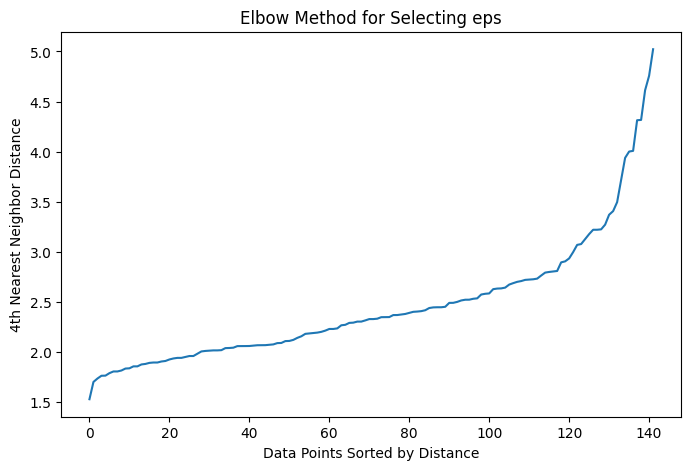

In [26]:
from sklearn.neighbors import NearestNeighbors

# Find the nearest neighbors for all points
neighbors = NearestNeighbors(n_neighbors=5)  # Check 5 nearest neighbors
neighbors_fit = neighbors.fit(df_train_scaled)
distances, indices = neighbors_fit.kneighbors(df_train_scaled)

# Sort distances and plot
distances = np.sort(distances[:, 4])  # Take the 4th nearest neighbor (k=5)
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("Elbow Method for Selecting eps")
plt.show()

Plot the nearest neighbor distances using the code above.
* Look for the elbow point → The point where the slope sharply increases.
* Before the elbow → Data points are close together (good for clustering).
* After the elbow → Distances increase rapidly, meaning these points are too far apart to be in the same cluster.
* Choose an eps value slightly before the elbow point.

In [27]:
#   |
#20 |                 _______
#   |               /
#15 |             /
#   |            /   <- (Elbow Point Here)
#10 |          /
#   |         /
# 5 |________|________________
#       100   200   300  (X-axis)

# The elbow is at Y ≈ 10, meaning that distances suddenly increase after this point.
# Choose eps ≈ 10 (or slightly lower, e.g., eps = 9 or 8).

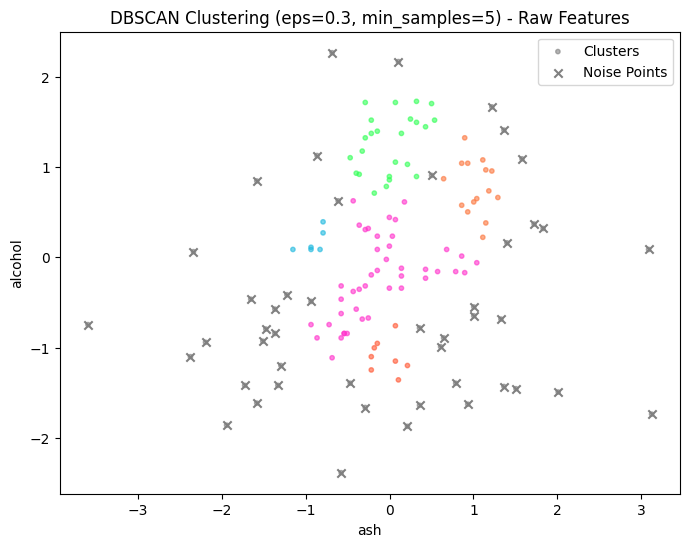

In [28]:

# 🚀 Toggle between using PCA or raw features
use_pca = False  # Set to True for PCA, False for raw features

# Ensure df_train_scaled is a DataFrame with correct column names
if isinstance(df_train_scaled, np.ndarray):  
    df_train_final = pd.DataFrame(df_train_scaled, columns=df_train.columns)  # Use original feature names

# Define which features to use if not using PCA
selected_features = ['ash', 'alcohol']  # Ensure these exist in df_train_original.columns

# If using raw features, check if they exist
if not use_pca:
    if not all(feature in df_train_final.columns for feature in selected_features):
        raise KeyError(f"Selected features {selected_features} not found in DataFrame columns: {df_train_final.columns}")

    df_viz = df_train_final[selected_features].copy()
    x_label, y_label = selected_features[0], selected_features[1]

# Apply PCA if use_pca is True
if use_pca:
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    df_viz = pd.DataFrame(pca.fit_transform(df_train_final), columns=['PCA1', 'PCA2'])
    x_label, y_label = 'PCA Component 1', 'PCA Component 2'

# Set DBSCAN parameters
eps_value = 0.3  # Distance threshold for core points (TUNE THIS)
min_samples_value = 5  # Minimum points required to form a dense region

# Fit DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df_viz['Cluster'] = dbscan.fit_predict(df_viz)

# Define a fixed list of colors
fixed_colors = ['gold', '#fc763d', '#20b9df', '#ff33cc', '#33ff57', '#ff5733', 
                '#3399ff', '#ff9933', '#9966ff', '#ff6666', '#66ff66', '#ffcc00']

# Assign colors dynamically (noise points in gray)
unique_clusters = sorted(set(df_viz['Cluster']))
colors = {c: fixed_colors[i % len(fixed_colors)] for i, c in enumerate(unique_clusters) if c != -1}
colors[-1] = 'gray'  # Noise points are gray

# Map colors to clusters
df_viz['c'] = df_viz['Cluster'].map(colors)

# Plot Clusters
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df_viz.iloc[:, 0], df_viz.iloc[:, 1], c=df_viz['c'], alpha=0.6, s=10, label="Clusters")

# Highlight Noise Points
noise_points = df_viz[df_viz['Cluster'] == -1]
plt.scatter(noise_points.iloc[:, 0], noise_points.iloc[:, 1], c='gray', marker='x', label="Noise Points")

# Plot Settings
plt.title(f'DBSCAN Clustering (eps={eps_value}, min_samples={min_samples_value}) - {"PCA Components" if use_pca else "Raw Features"}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.show()

In [29]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist

# 🚀 Train DBSCAN on all features
eps_value = 1.6  # Adjust based on nearest neighbor analysis
min_samples_value = 5
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df_train_scaled_df['Cluster_DBSCAN'] = dbscan.fit_predict(df_train_scaled_df)

# 🔹 Extract Core Sample Points (Ensure Feature Consistency)
core_mask = df_train_scaled_df['Cluster_DBSCAN'] != -1  # Only keep clustered core points
core_samples = df_train_scaled_df.loc[core_mask].drop(columns=['Cluster_DBSCAN'])  # Drop cluster label

# 🔹 Ensure Test Data Has Matching Features (Exclude Cluster Column)
df_test_features = df_test_scaled_df.copy()  # Copy to maintain structure

# 🔹 Ensure Core Samples and Test Data Have the Same Columns
common_columns = core_samples.columns.intersection(df_test_features.columns)
core_samples = core_samples[common_columns]
df_test_features = df_test_features[common_columns]

# 🔹 Assign Test Data to Closest Core Sample
if not core_samples.empty:  # Ensure core points exist
    df_test_scaled_df['Cluster_DBSCAN'] = np.argmin(cdist(df_test_features, core_samples), axis=1)
else:
    df_test_scaled_df['Cluster_DBSCAN'] = -1  # Assign noise (-1) if no clusters exist


In [30]:
df_test_scaled_df['Cluster_DBSCAN'].head()

0    4
1    4
2    4
3    0
4    3
Name: Cluster_DBSCAN, dtype: int64